In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 
import csv
import time
import tensorflow as tf

In [85]:
plt.rcParams.update({'font.size': 16})

In [2]:

pd.set_option("display.max_columns", 4)

In [3]:
file_path = "../Data_acquisition/Final DB/commercial/"

In [4]:
data = pd.read_csv(file_path + "merged_energy.csv")
data.head()

,Unnamed: 0,Time,Total_Electricity_[MW],Avg_Electricity_[MW]
0,0,2004-01-01,91.544051,5.721503
1,1,2004-01-02,139.309069,8.706817
2,2,2004-01-03,142.005346,8.875334
3,3,2004-01-04,136.463365,8.528960
4,4,2004-01-05,136.404463,8.525279


In [5]:
series = data["Avg_Electricity_[MW]"]
series

0      5.721503
1      8.706817
2      8.875334
3      8.528960
4      8.525279
         ...   
360    8.531843
361    8.703300
362    8.595042
363    6.176680
364    5.452419
Name: Avg_Electricity_[MW], Length: 365, dtype: float64

In [6]:
series = series.to_list()


In [7]:
from pandas.plotting import autocorrelation_plot

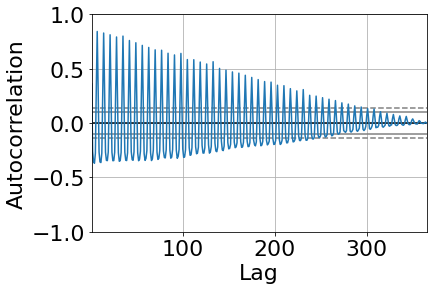

In [8]:
autocorrelation_plot(series)
plt.show()

In [9]:
from statsmodels.tsa.arima_model import ARIMA

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                ARIMA(10, 1, 0)   Log Likelihood                -398.411
Method:                       css-mle   S.D. of innovations              0.715
Date:                Tue, 19 Jan 2021   AIC                            820.823
Time:                        22:00:31   BIC                            867.589
Sample:                             1   HQIC                           839.410
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.008     -0.151      0.880      -0.016       0.014
ar.L1.D.y     -0.6835      0.052    -13.079      0.000      -0.786      -0.581
ar.L2.D.y     -0.6977      0.063    -11.011      0.0

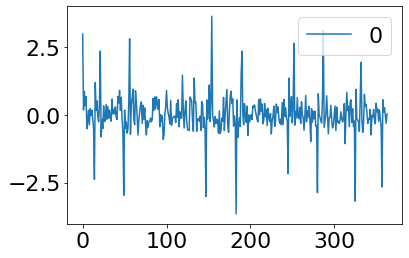

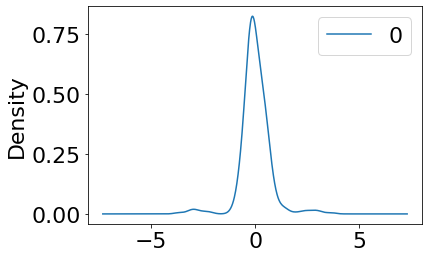

                0
count  364.000000
mean     0.012224
std      0.731434
min     -3.659215
25%     -0.268248
50%     -0.064351
75%      0.322284
max      3.642186
25.026686191558838


In [10]:
start = time.time()
# fit model
model = ARIMA(series, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

print(time.time()-start)

In [11]:
start = time.time()

size = int(len(series) * 0.7)
train, test = series[0:size], series[size:len(series)]
predictions = list()
history = train
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

print(time.time()-start)

predicted=9.652953, expected=9.722452
predicted=9.986359, expected=9.756130
predicted=9.263638, expected=10.095722
predicted=7.156303, expected=7.052386
predicted=6.602244, expected=6.428262
predicted=9.439605, expected=9.673972
predicted=10.008398, expected=9.669687
predicted=9.421204, expected=9.917716
predicted=9.995847, expected=9.951881
predicted=9.924711, expected=9.791360
predicted=7.278163, expected=6.682292
predicted=6.558157, expected=6.470221
predicted=9.296063, expected=9.991803
predicted=9.976435, expected=9.697727
predicted=9.753058, expected=9.858146
predicted=10.148217, expected=10.016073
predicted=9.569971, expected=9.872849
predicted=6.974082, expected=6.777860
predicted=6.784131, expected=5.750248
predicted=9.393473, expected=9.573622
predicted=9.757369, expected=9.509355
predicted=9.468660, expected=9.617104
predicted=10.167869, expected=9.949640
predicted=9.747669, expected=9.834868
predicted=6.947038, expected=6.525685
predicted=6.062818, expected=5.663154
predict

In [12]:
time_valid = np.arange(len(test))

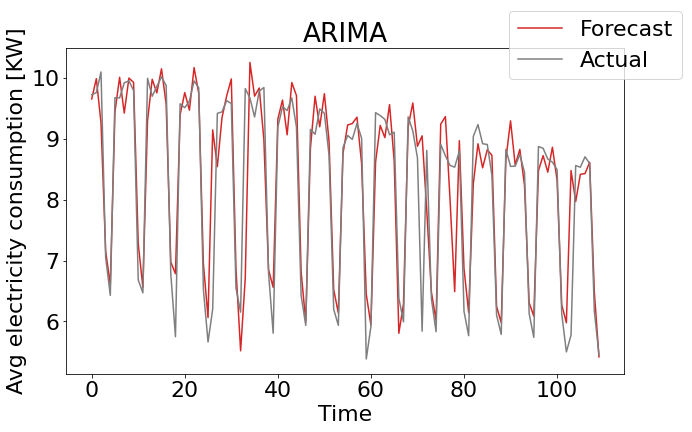

In [13]:
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.plot(time_valid, predictions, color = "tab:red", label = "Forecast")
ax1.plot(time_valid, test, color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("ARIMA")
ax1.set_ylabel("Avg electricity consumption [KW]")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")


In [14]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [15]:
mean_absolute_percentage_error(test,predictions)

5.816885702813583

In [24]:
arima = np.array(predictions).reshape(1,-1)

In [27]:
arima

array([[ 9.65295258,  9.98635914,  9.2636381 ,  7.15630267,  6.60224379,
         9.43960478, 10.00839813,  9.42120419,  9.99584697,  9.92471115,
         7.27816339,  6.55815742,  9.29606303,  9.97643478,  9.75305846,
        10.14821676,  9.56997068,  6.97408204,  6.78413115,  9.39347327,
         9.75736913,  9.46865989, 10.16786935,  9.74766919,  6.94703774,
         6.06281833,  9.14543784,  8.54157943,  9.3470377 ,  9.70185039,
         9.98208032,  6.86929205,  5.51786217,  6.70995174, 10.25203352,
         9.69934221,  9.83222638,  8.98467299,  6.85117866,  6.55922966,
         9.32406094,  9.63444096,  9.06411932,  9.92262845,  9.70878491,
         6.81816718,  5.99021115,  8.83991995,  9.69775678,  9.19628489,
         9.73948576,  8.96253097,  6.52392029,  6.13734105,  8.75775457,
         9.22612451,  9.24996092,  9.35367157,  8.59065476,  6.44629659,
         5.94219149,  8.61830784,  9.21819322,  9.01757657,  9.56061673,
         8.63589742,  5.80593342,  6.29167961,  9.1

In [25]:
cnn = [ 9.690561 ,  9.856063 ,  9.49542  ,  6.7927966,  6.1378493,
        9.97452  ,  9.21166  ,  9.279228 , 10.084622 ,  9.5164385,
        6.747833 ,  6.0229807, 10.207461 ,  9.667146 ,  9.410351 ,
       10.127048 ,  9.529996 ,  6.7594976,  6.0451865,  8.189129 ,
        9.144629 ,  9.533034 ,  9.897593 ,  9.99654  ,  6.6702776,
        6.012308 ,  7.853605 ,  9.517074 ,  9.580472 ,  9.774162 ,
        9.740881 ,  7.192751 ,  6.0159926, 10.008855 ,  9.658908 ,
        9.585292 ,  9.482471 ,  9.699624 ,  6.6724052,  6.0367064,
        8.416239 ,  8.776542 ,  9.569837 ,  9.643363 ,  9.71403  ,
        6.512457 ,  5.939014 ,  8.84806  ,  8.936559 ,  9.232379 ,
        9.7426405,  9.170242 ,  6.4079356,  5.831163 ,  9.02455  ,
        8.721313 ,  9.291375 ,  9.1038685,  8.995204 ,  6.355504 ,
        5.9916635,  8.740025 ,  9.439844 ,  9.615029 ,  9.494632 ,
        8.526159 ,  6.3622236,  5.8922167,  9.269359 ,  9.332312 ,
        9.2105055,  8.695671 ,  5.715711 ,  7.9601307,  5.77639  ,
        9.30456  ,  9.018624 ,  8.650532 ,  7.67815  ,  8.3285   ,
        6.344697 ,  5.8393073,  8.861857 ,  9.090475 ,  9.337067 ,
        8.918189 ,  8.6624775,  6.2013636,  5.7528653,  8.600185 ,
        8.858291 ,  8.731983 ,  8.64225  ,  8.342157 ,  6.087197 ,
        5.8126283,  8.667084 ,  8.889881 ,  8.978686 ,  8.691084 ,
        8.17227  ,  6.1179914,  5.7980576,  7.659344 ,  8.943337 ,
        8.520313 ,  8.764913 ,  8.453621 ,  6.4743633,  5.6758914]

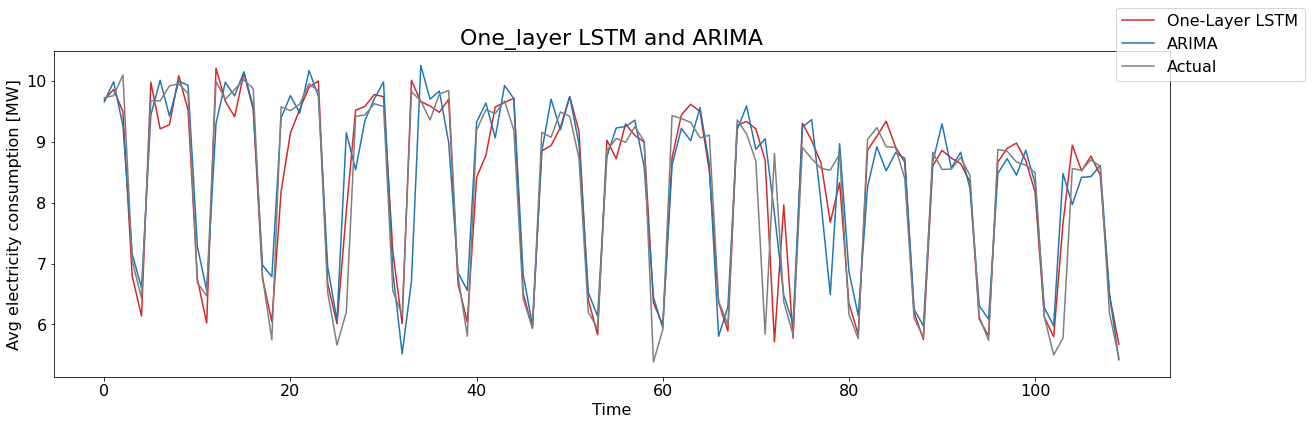

In [97]:
fig, ax1 = plt.subplots(figsize = (20,6))
ax1.plot(time_valid, cnn, color = "tab:red", label = "One-Layer LSTM")
ax1.plot(time_valid, predictions, color = "tab:blue", label = "ARIMA")
ax1.plot(time_valid, test, color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("One_layer LSTM and ARIMA", fontsize = 22)
ax1.set_ylabel("Avg electricity consumption [MW]")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

In [30]:
data.columns

Index(['Unnamed: 0', 'Time', 'Total_Electricity_[MW]', 'Avg_Electricity_[MW]'], dtype='object')

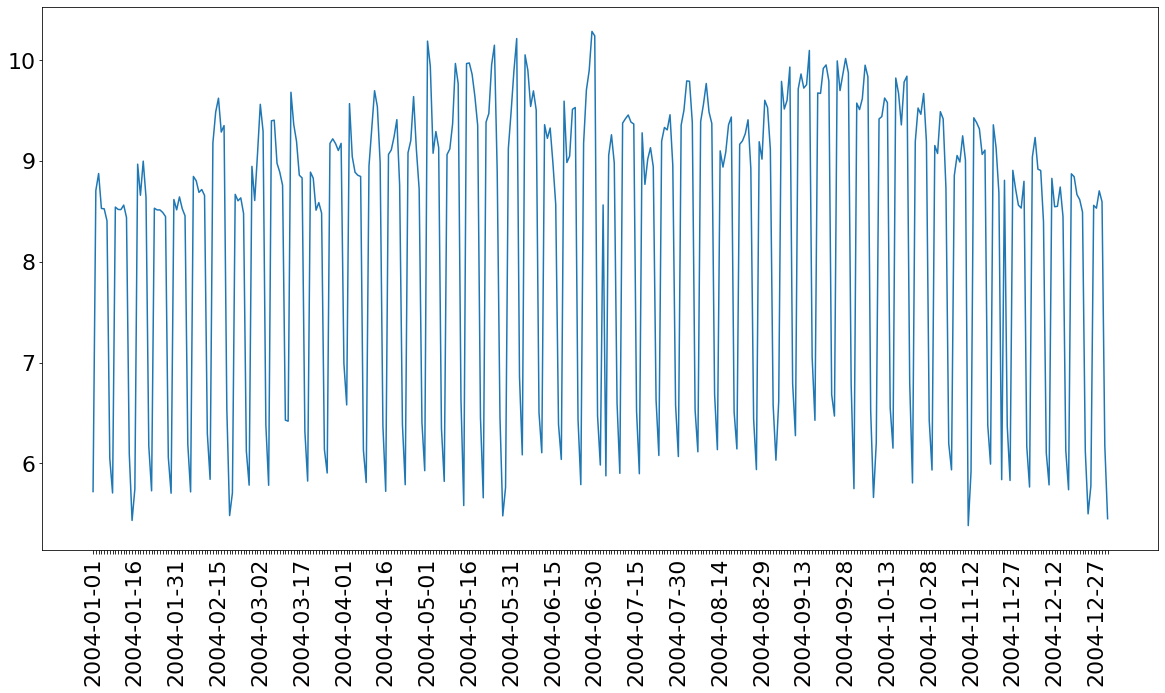

In [47]:
plt.figure(figsize=(20,10))
_ = plt.plot(data.Time,data["Avg_Electricity_[MW]"])
ax = plt.gca()
plt.xticks(rotation=90)
for idx,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if idx % 15 != 0:
        label.set_visible(False)

In [35]:
type(data["Avg_Electricity_[MW]"])

pandas.core.series.Series

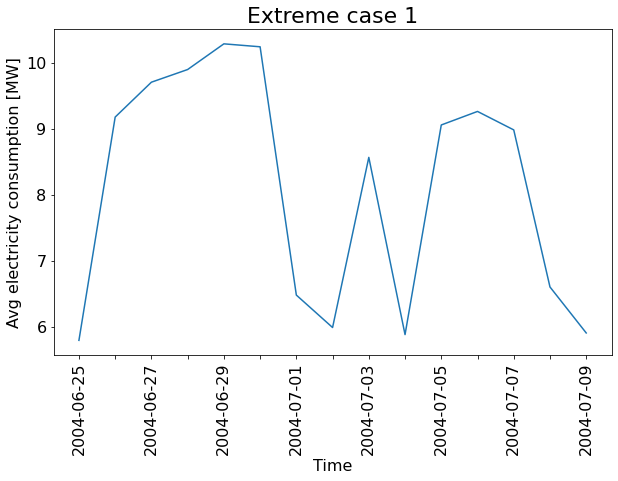

In [95]:
plt.figure(figsize=(10,6))
_ = plt.plot(data.Time[175:190],data["Avg_Electricity_[MW]"][175:190])
ax = plt.gca()
plt.title("Extreme case 1", fontsize = 22)
plt.ylabel("Avg electricity consumption [MW]")
plt.xlabel("Time")
plt.xticks(rotation=90)
for idx,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if idx % 2 != 0:
        label.set_visible(False)

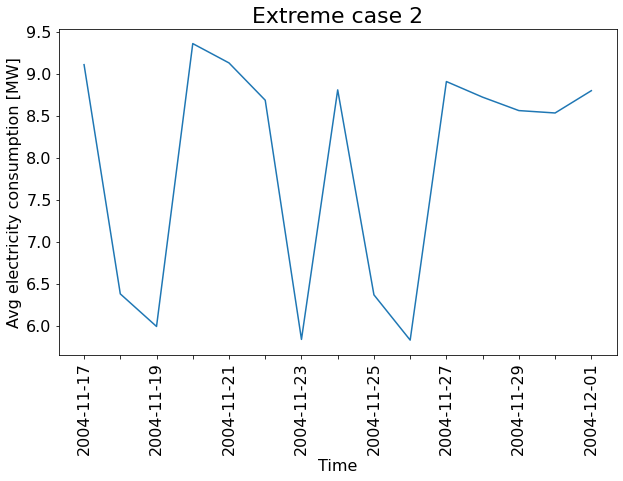

In [94]:
plt.figure(figsize=(10,6))
_ = plt.plot(data.Time[320:335],data["Avg_Electricity_[MW]"][320:335])
ax = plt.gca()
plt.title("Extreme case 2", fontsize = 22)
plt.ylabel("Avg electricity consumption [MW]")
plt.xlabel("Time")
plt.xticks(rotation=90)
for idx,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if idx % 2 != 0:
        label.set_visible(False)

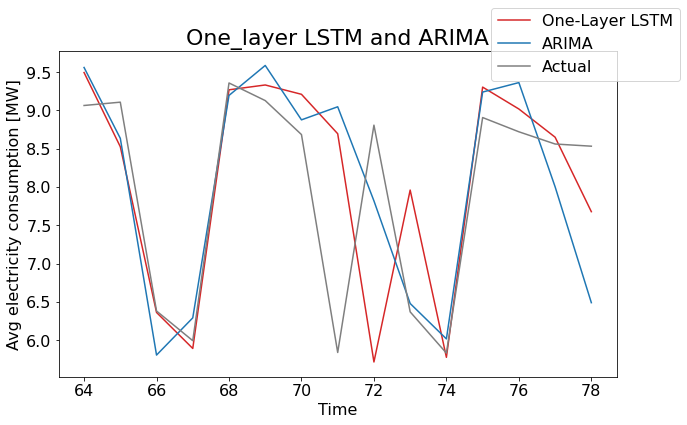

In [99]:
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.plot(time_valid[64:79], cnn[64:79], color = "tab:red", label = "One-Layer LSTM")
ax1.plot(time_valid[64:79], predictions[64:79], color = "tab:blue", label = "ARIMA")
ax1.plot(time_valid[64:79], test[64:79], color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("One_layer LSTM and ARIMA", fontsize = 22)
ax1.set_ylabel("Avg electricity consumption [MW]")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

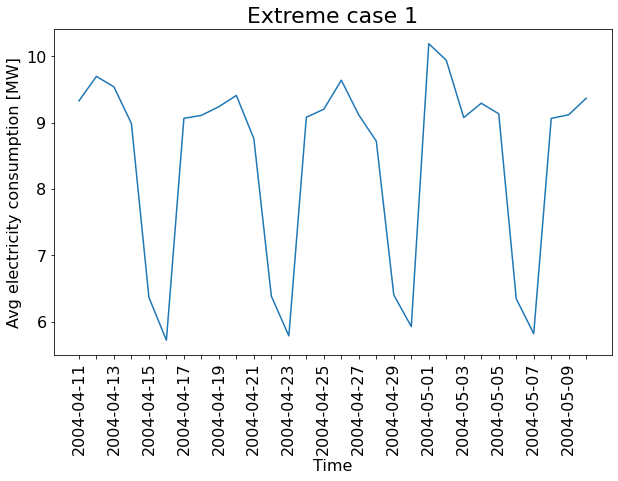

In [93]:
plt.figure(figsize=(10,6))
_ = plt.plot(data.Time[100:130],data["Avg_Electricity_[MW]"][100:130])
ax = plt.gca()
plt.title("Extreme case 1", fontsize = 22)
plt.ylabel("Avg electricity consumption [MW]")
plt.xlabel("Time")
plt.xticks(rotation=90)
for idx,label in enumerate(ax.get_xaxis().get_ticklabels()):
    if idx % 2 != 0:
        label.set_visible(False)